In [5]:
import numpy as np
import pandas as pd

In [6]:
# 2.3.1. Загрузка данных и первичный анализ
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt

df = pd.read_csv('S06-hw-dataset-01.csv')

print("=== head() ===")
print(df.head())
print("\n=== info() ===")
print(df.info())
print("\n=== describe() ===")
print(df.describe())
print("\n=== Распределение таргета target ===")
print(df['target'].value_counts(normalize=True))
print("\n=== Проверка пропусков ===")
print(df.isnull().sum())
print("\n=== Типы столбцов ===")
print(df.dtypes)

X = df.drop(columns=['id', 'target'])
y = df['target']
print(f"\nX.shape: {X.shape}, y.shape: {y.shape}")

=== head() ===
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746987  0.049639  2.414689   
4  0.923689  0.537345  ... -2.183407 -2.896590  2.440343 -1.097168  1.457323   

   cat_contract  cat_region  

In [7]:
# 2.3.2. Train/Test-сплит и воспроизводимость
# 1) Разделить данные на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"Train размер: {X_train.shape}")
print(f"Test размер: {X_test.shape}")
print(f"\nРаспределение классов в y_train:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в y_test:")
print(y_test.value_counts(normalize=True))

# 2) Короткое пояснение
print("Фиксированный random_state=42 гарантирует воспроизводимое разбиение данных.")
print("Стратификация (stratify=y) сохраняет пропорции классов в обучающей и тестовой выборках, что важно для редких категорий.")

Train размер: (9600, 28)
Test размер: (2400, 28)

Распределение классов в y_train:
target
0    0.676562
1    0.323437
Name: proportion, dtype: float64

Распределение классов в y_test:
target
0    0.676667
1    0.323333
Name: proportion, dtype: float64
Фиксированный random_state=42 гарантирует воспроизводимое разбиение данных.
Стратификация (stratify=y) сохраняет пропорции классов в обучающей и тестовой выборках, что важно для редких категорий.


In [8]:
# 2.3.3. Baseline’ы
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

print("=== Baseline 1: DummyClassifier (most_frequent) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dummy):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_dummy):.4f}")
print("\nИнтерпретация: DummyClassifier всегда предсказывает наиболее частый класс.")
print("Его метрики показывают, что дает случайное угадывание по большинству классу.")
print("Любая осмысленная модель должна превзойти эти показатели.")

#LogisticRegression
print("\n" + "="*50 + "\n")
print("=== Baseline 2: LogisticRegression со StandardScaler ===")

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")
print("\nИнтерпретация: LogisticRegression - простая, но осмысленная модель.")
print("Она уже учитывает взаимосвязь признаков с целевой переменной.")
print("Эти метрики служат реалистичным baseline'ом для сравнения с более сложными моделями.")

=== Baseline 1: DummyClassifier (most_frequent) ===
Accuracy: 0.6767
F1-score: 0.0000
ROC-AUC: 0.5000

Интерпретация: DummyClassifier всегда предсказывает наиболее частый класс.
Его метрики показывают, что дает случайное угадывание по большинству классу.
Любая осмысленная модель должна превзойти эти показатели.


=== Baseline 2: LogisticRegression со StandardScaler ===
Accuracy: 0.8275
F1-score: 0.7076
ROC-AUC: 0.8747

Интерпретация: LogisticRegression - простая, но осмысленная модель.
Она уже учитывает взаимосвязь признаков с целевой переменной.
Эти метрики служат реалистичным baseline'ом для сравнения с более сложными моделями.


In [9]:
# 2.3.4. Модели недели 6 (обязательно)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    return model

#DecisionTreeClassifier
print("="*60)
print("1. DecisionTreeClassifier - подбор гиперпараметров")
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
dt_grid.fit(X_train, y_train)
print(f"Лучшие параметры: {dt_grid.best_params_}")
print(f"Лучший CV ROC-AUC: {dt_grid.best_score_:.4f}")

dt_best = evaluate_model(
    dt_grid.best_estimator_,
    "DecisionTreeClassifier (лучшая модель)",
    X_train, X_test, y_train, y_test
)

#RandomForestClassifier
print("\n" + "="*60)
print("2. RandomForestClassifier - подбор гиперпараметров")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
print(f"Лучшие параметры: {rf_grid.best_params_}")
print(f"Лучший CV ROC-AUC: {rf_grid.best_score_:.4f}")

rf_best = evaluate_model(
    rf_grid.best_estimator_,
    "RandomForestClassifier (лучшая модель)",
    X_train, X_test, y_train, y_test
)

#AdaBoostClassifier
print("\n" + "="*60)
print("3. AdaBoostClassifier - подбор гиперпараметров")
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

ada_grid = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    ada_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
ada_grid.fit(X_train, y_train)
print(f"Лучшие параметры: {ada_grid.best_params_}")
print(f"Лучший CV ROC-AUC: {ada_grid.best_score_:.4f}")

ada_best = evaluate_model(
    ada_grid.best_estimator_,
    "AdaBoostClassifier (лучшая модель)",
    X_train, X_test, y_train, y_test
)

#StackingClassifier (опционально)
print("\n" + "="*60)
print("4. StackingClassifier")

base_estimators = [
    ('rf', rf_grid.best_estimator_),
    ('ada', ada_grid.best_estimator_)
]

stacking = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=5,
    n_jobs=-1
)

stacking = evaluate_model(
    stacking,
    "StackingClassifier",
    X_train, X_test, y_train, y_test
)

print("\n" + "="*60)
print("Итоговое сравнение моделей на тестовой выборке:")
print("(ROC-AUC)")
print(f"1. DummyClassifier: {roc_auc_score(y_test, y_proba_dummy):.4f}")
print(f"2. LogisticRegression: {roc_auc_score(y_test, y_proba_lr):.4f}")
print(f"3. DecisionTree: {roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1]):.4f}")
print(f"4. RandomForest: {roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]):.4f}")
print(f"5. AdaBoost: {roc_auc_score(y_test, ada_best.predict_proba(X_test)[:, 1]):.4f}")
print(f"6. Stacking: {roc_auc_score(y_test, stacking.predict_proba(X_test)[:, 1]):.4f}")

1. DecisionTreeClassifier - подбор гиперпараметров
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
Лучший CV ROC-AUC: 0.9087

=== DecisionTreeClassifier (лучшая модель) ===
Accuracy: 0.8675
F1-score: 0.7857
ROC-AUC: 0.8982

2. RandomForestClassifier - подбор гиперпараметров
Лучшие параметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Лучший CV ROC-AUC: 0.9687

=== RandomForestClassifier (лучшая модель) ===
Accuracy: 0.9271
F1-score: 0.8817
ROC-AUC: 0.9665

3. AdaBoostClassifier - подбор гиперпараметров
Лучшие параметры: {'learning_rate': 1.0, 'n_estimators': 200}
Лучший CV ROC-AUC: 0.9101

=== AdaBoostClassifier (лучшая модель) ===
Accuracy: 0.8462
F1-score: 0.7432
ROC-AUC: 0.9070

4. StackingClassifier

=== StackingClassifier ===
Accuracy: 0.9313
F1-score: 0.8914
ROC-AUC: 0.9675

Итоговое сравнение моделей на тестовой выборке:
(ROC-AUC)
1. DummyClassifier: 0.5000
2. LogisticRegression: 0.8747
3. DecisionTre

Лучшая модель для визуализации: Stacking
Её ROC-AUC: 0.9675


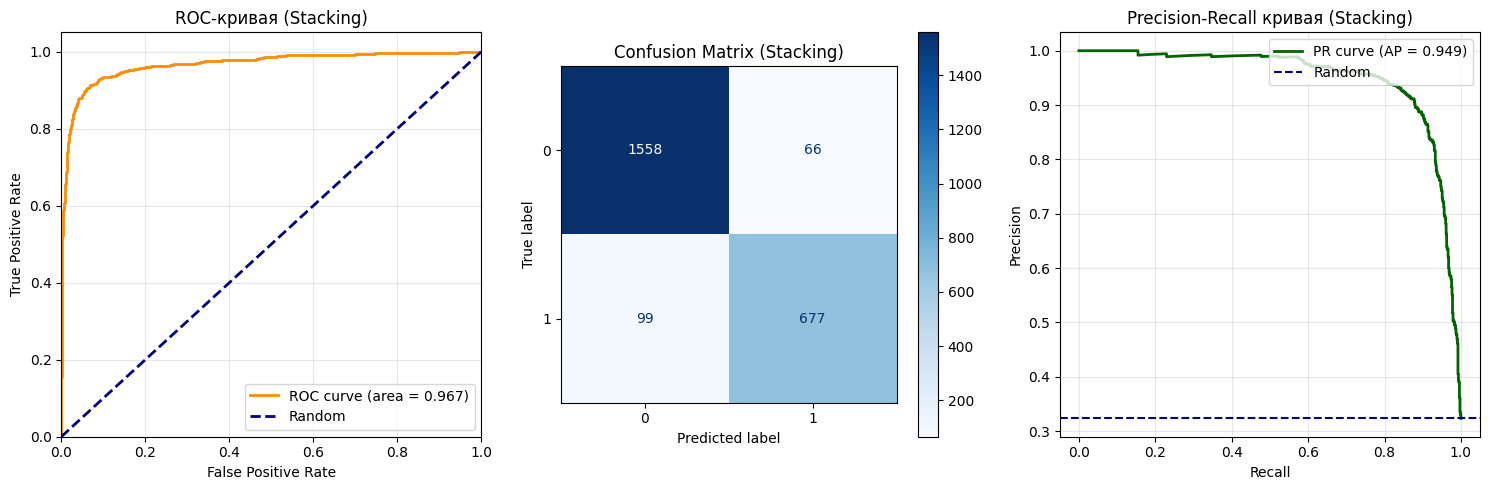


Сводная таблица метрик для всех моделей (на тестовой выборке):
------------------------------------------------------------
Модель                      Accuracy   F1-score    ROC-AUC
------------------------------------------------------------
Dummy                         0.6767     0.0000     0.5000
LogisticRegression            0.8275     0.7076     0.8747
LogisticRegression            0.8275     0.7076     0.8747
DecisionTree                  0.8675     0.7857     0.8982
RandomForest                  0.9271     0.8817     0.9665
AdaBoost                      0.8462     0.7432     0.9070
Stacking                      0.9313     0.8914     0.9675

Примечание по метрикам:
1. Accuracy - доля верных предсказаний
2. F1-score - гармоническое среднее precision и recall
3. ROC-AUC - площадь под ROC-кривой, показывает качество разделения классов
   (чем ближе к 1, тем лучше)


In [10]:
# 2.3.5. Метрики качества (обязательно)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

models = {
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_best,
    'RandomForest': rf_best,
    'AdaBoost': ada_best,
    'Stacking': stacking
}

# Находим модель
best_model_name = max(models.keys(), 
                     key=lambda name: roc_auc_score(y_test, models[name].predict_proba(X_test)[:, 1]))
best_model = models[best_model_name]
print(f"Лучшая модель для визуализации: {best_model_name}")
print(f"Её ROC-AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.4f}")

y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

#ROC-кривая
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая ({best_model_name})')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

#Confusion matrix
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title(f'Confusion Matrix ({best_model_name})')

#PR-кривая (дополнительно)
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
average_precision = average_precision_score(y_test, y_proba_best)

plt.plot(recall, precision, color='darkgreen', lw=2, 
         label=f'PR curve (AP = {average_precision:.3f})')
baseline = len(y_test[y_test==1]) / len(y_test)
plt.axhline(y=baseline, color='navy', linestyle='--', label='Random')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall кривая ({best_model_name})')
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сводная таблица метрик
print("\n" + "="*60)
print("Сводная таблица метрик для всех моделей (на тестовой выборке):")
print("-"*60)
print(f"{'Модель':25} {'Accuracy':>10} {'F1-score':>10} {'ROC-AUC':>10}")
print("-"*60)

for name, model in [('Dummy', dummy), ('LogisticRegression', lr_pipeline)] + list(models.items()):
    if name == 'Dummy':
        y_pred = y_pred_dummy
        y_proba = y_proba_dummy
    elif name == 'LogisticRegression':
        y_pred = y_pred_lr
        y_proba = y_proba_lr
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    
    print(f"{name:25} {acc:10.4f} {f1:10.4f} {roc:10.4f}")

print("="*60)
print("\nПримечание по метрикам:")
print("1. Accuracy - доля верных предсказаний")
print("2. F1-score - гармоническое среднее precision и recall")
print("3. ROC-AUC - площадь под ROC-кривой, показывает качество разделения классов")
print("   (чем ближе к 1, тем лучше)")

LogisticRegression  : 0.8747
DecisionTree        : 0.8982
RandomForest        : 0.9665
AdaBoost            : 0.9070
Stacking            : 0.9675

Лучшая модель: Stacking (ROC-AUC = 0.9675)

Вычисление permutation importance...

Топ-15 признаков по permutation importance (Stacking):
Признак                     Важность       ±Std
------------------------------------------------------------
num19                         0.0620     0.0022
num18                         0.0543     0.0038
num07                         0.0255     0.0014
num04                         0.0159     0.0010
num20                         0.0136     0.0020
num01                         0.0106     0.0011
num24                         0.0078     0.0008
num08                         0.0069     0.0008
num14                         0.0066     0.0007
num22                         0.0065     0.0010
num16                         0.0053     0.0007
num17                         0.0049     0.0004
num06                         0.

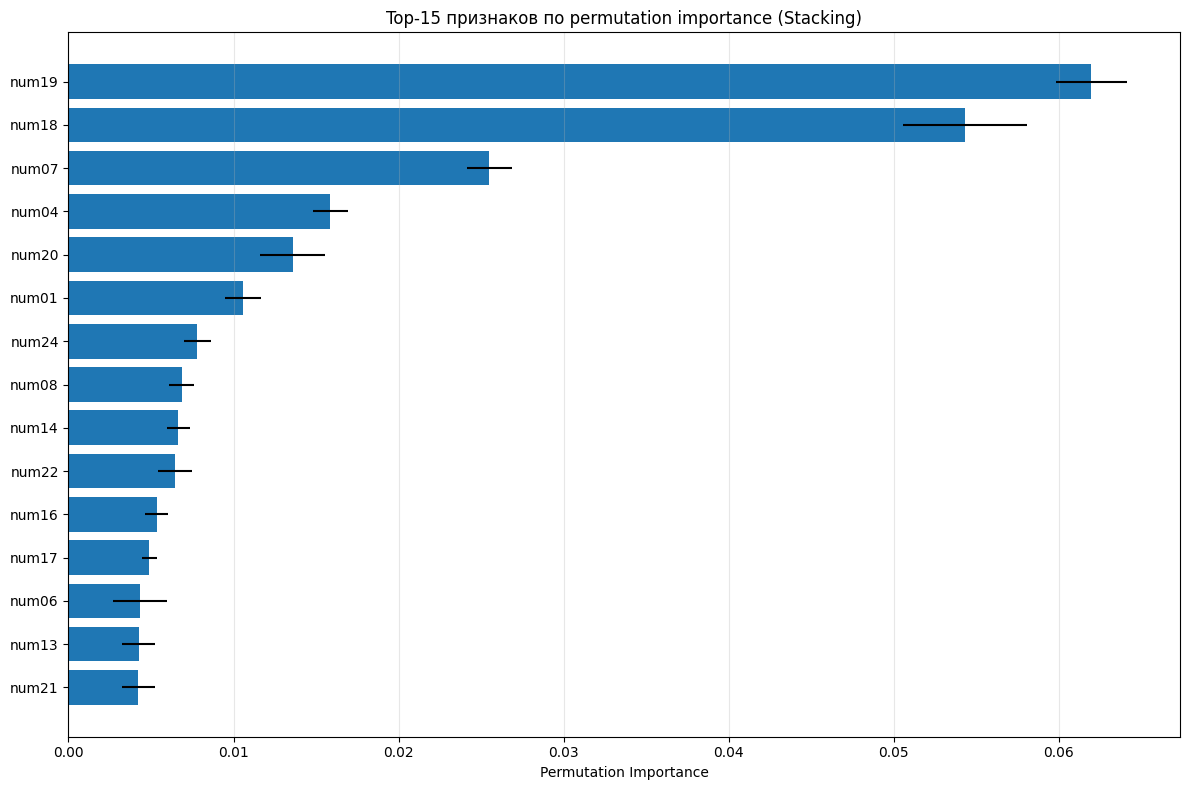

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:

Наиболее важные признаки:
1. num19: важность = 0.0620
2. num18: важность = 0.0543
3. num07: важность = 0.0255
4. num04: важность = 0.0159
5. num20: важность = 0.0136
1. Категориальные признаки:
   - cat_region: -0.0000
   - cat_contract: -0.0001
   - cat_payment: -0.0001

Числовые признаки:
   - num19: 0.0620
   - num18: 0.0543
   - num07: 0.0255
   - num04: 0.0159
   - num20: 0.0136

tenure_months:
   - Важность: 0.0001
   - Место в рейтинге: 20

Общие наблюдения:
   - Диапазон важностей: от 0.0620 до -0.0003
   - Количество признаков с важностью > 0: 21
   - Количество признаков с важностью > 0.01: 6


In [11]:
# 2.3.6. Интерпретация (обязательно)
from sklearn.inspection import permutation_importance
import numpy as np

# Считаем ROC-AUC для всех моделей
model_scores = {}
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    model_scores[name] = roc_auc
    print(f"{name:20}: {roc_auc:.4f}")

# Определяем лучшую модель
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"\nЛучшая модель: {best_model_name} (ROC-AUC = {model_scores[best_model_name]:.4f})")

#permutation importance
print("\nВычисление permutation importance...")
result = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)

importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

print("\n" + "="*60)
print(f"Топ-15 признаков по permutation importance ({best_model_name}):")
print("="*60)
print(f"{'Признак':25} {'Важность':>10} {'±Std':>10}")
print("-"*60)

for i in range(min(15, len(indices))):
    idx = indices[i]
    print(f"{X.columns[idx]:25} {importances[idx]:10.4f} {std[idx]:10.4f}")

# Визуализация
plt.figure(figsize=(12, 8))
top_n = min(15, len(indices))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], xerr=std[indices[:top_n]][::-1])
plt.yticks(range(top_n), [X.columns[indices[i]] for i in range(top_n-1, -1, -1)])
plt.xlabel('Permutation Importance')
plt.title(f'Top-{top_n} признаков по permutation importance ({best_model_name})')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")

print("\nНаиболее важные признаки:")
for i in range(min(5, len(indices))):
    idx = indices[i]
    feature_name = X.columns[idx]
    importance = importances[idx]
    print(f"{i+1}. {feature_name}: важность = {importance:.4f}")

print("1. Категориальные признаки:")
cat_features = [col for col in X.columns if col.startswith('cat_')]
cat_importance = {}
for i, idx in enumerate(indices):
    if X.columns[idx] in cat_features:
        cat_importance[X.columns[idx]] = importances[idx]

if cat_importance:
    for feat, imp in list(cat_importance.items())[:3]:
        print(f"   - {feat}: {imp:.4f}")
else:
    print("   - Категориальные признаки не вошли в топ важных")

print("\nЧисловые признаки:")
num_features = [col for col in X.columns if col.startswith('num')]
top_num = []
for i, idx in enumerate(indices[:10]):  # Смотрим только в топ-10
    if X.columns[idx] in num_features:
        top_num.append((X.columns[idx], importances[idx]))

for feat, imp in top_num[:5]:
    print(f"   - {feat}: {imp:.4f}")

print("\ntenure_months:")
if 'tenure_months' in X.columns:
    idx = list(X.columns).index('tenure_months')
    print(f"   - Важность: {importances[idx]:.4f}")
    print(f"   - Место в рейтинге: {list(indices).index(idx) + 1}")

print("\nОбщие наблюдения:")
print(f"   - Диапазон важностей: от {importances[indices[0]]:.4f} до {importances[indices[-1]]:.4f}")
print(f"   - Количество признаков с важностью > 0: {(importances > 0).sum()}")
print(f"   - Количество признаков с важностью > 0.01: {(importances > 0.01).sum()}")

In [13]:
import json
import joblib
import os
from datetime import datetime

artifacts_dir = 'artifacts/'
os.makedirs(artifacts_dir, exist_ok=True)
os.makedirs(os.path.join(artifacts_dir, 'figures'), exist_ok=True)

print("Сохранили всё!")

metrics_data = {}
for name, model in [('Dummy', dummy), ('LogisticRegression', lr_pipeline)] + list(models.items()):
    if name == 'Dummy':
        y_pred = y_pred_dummy
        y_proba = y_proba_dummy
    elif name == 'LogisticRegression':
        y_pred = y_pred_lr
        y_proba = y_proba_lr
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    metrics_data[name] = {
        'accuracy': float(accuracy_score(y_test, y_pred)),
        'f1_score': float(f1_score(y_test, y_pred)),
        'roc_auc': float(roc_auc_score(y_test, y_proba))
    }

with open(os.path.join(artifacts_dir, 'metrics_test.json'), 'w') as f:
    json.dump(metrics_data, f, indent=2)


search_summaries = {
    'DecisionTree': {
        'best_params': str(dt_grid.best_params_),
        'best_score': float(dt_grid.best_score_),
        'cv_scheme': '5-fold CV',
        'scoring': 'roc_auc'
    },
    'RandomForest': {
        'best_params': str(rf_grid.best_params_),
        'best_score': float(rf_grid.best_score_),
        'cv_scheme': '5-fold CV',
        'scoring': 'roc_auc'
    },
    'AdaBoost': {
        'best_params': str(ada_grid.best_params_),
        'best_score': float(ada_grid.best_score_),
        'cv_scheme': '5-fold CV',
        'scoring': 'roc_auc'
    }
}

with open(os.path.join(artifacts_dir, 'search_summaries.json'), 'w') as f:
    json.dump(search_summaries, f, indent=2)

joblib.dump(best_model, os.path.join(artifacts_dir, 'best_model.joblib'))


y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

best_model_meta = {
    'model_name': best_model_name,
    'model_type': str(type(best_model).__name__),
    'test_metrics': {
        'accuracy': float(accuracy_score(y_test, y_pred_best)),
        'f1_score': float(f1_score(y_test, y_pred_best)),
        'roc_auc': float(roc_auc_score(y_test, y_proba_best))
    },
    'parameters': str(best_model.get_params()) if hasattr(best_model, 'get_params') else 'N/A',
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset': 'S06-hw-dataset-01.csv',
    'features_used': list(X.columns),
    'train_shape': X_train.shape,
    'test_shape': X_test.shape
}

with open(os.path.join(artifacts_dir, 'best_model_meta.json'), 'w') as f:
    json.dump(best_model_meta, f, indent=2)

#ROC-кривая
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая ({best_model_name})')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(artifacts_dir, 'figures', 'roc_curve.png'), dpi=150)
plt.close()

#Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title(f'Confusion Matrix ({best_model_name})')
plt.tight_layout()
plt.savefig(os.path.join(artifacts_dir, 'figures', 'confusion_matrix.png'), dpi=150)
plt.close()

#Permutation importance
plt.figure(figsize=(10, 8))
top_n = min(15, len(indices))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], xerr=std[indices[:top_n]][::-1])
plt.yticks(range(top_n), [X.columns[indices[i]] for i in range(top_n-1, -1, -1)])
plt.xlabel('Permutation Importance')
plt.title(f'Top-{top_n} признаков по permutation importance ({best_model_name})')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(os.path.join(artifacts_dir, 'figures', 'permutation_importance.png'), dpi=150)
plt.close()

Сохранили всё!
